In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
# Data yang diberikan
date_range = pd.date_range(start='2010-01', end='2024-10', freq='M')
data = {
    "IHK": [87.3636951539197,
      87.0501977916883,87.0064539737025,
       86.9918727010406,86.9991633373716,89.806058324792,91.6870424981803,91.0819196827104,
       91.9349241334329,91.920342860771,93.0066476740844,94.7126565755295,96.4332467496366,
       96.1270400237362,93.9544303971095,92.4817218582551,92.9191600381128,93.8013270341592,
       94.6834940302057,95.6531486622236,96.8196504751776,96.6446752032345,96.6811283848893,97.322704382014,98.3871372863345,
       97.1185665647471,97.6216204715835,97.6726549259002,98.3579747410106,100.180633823751,100.494131185983,100.916988093178,
       101.106544637783,101.1575790921,100.800337911883,101.427332636346,102.907331811531,103.439548263691,103.541617172325,103.461420172684,
       104.044671079161,105.429891982044,108.856491057596,110.161514960838,109.148116510835,110.09589923386,109.855308234938,110.292746414796,
       111.962,111.235,111.421,111.534,111.712,111.944,113.419,113.63,113.832,114.444,116.955,119.942,118.916,117.157,116.861,117.187,118.478,
       119.126,120.97,121.268,119.866,119.9,120.421,121.581,122.134,122.399,122.649,121.032,121.894,123.156,124.563,124.684,124.487,125.887,
       126.533,126.924,127.314,125.7,126.14,126.861,127.232,127.863,128.265,128.016,127.584,127.718,128.726,130.522,131.625,130.618,131.397,
       131.673,131.557,133.272,132.379,132.473,131.844,132.955,133.205,134.396,133.822,133.444,133.886,134.684,135.357,136.739,137.345,
       136.292,135.943,136.053,135.785,136.282,136.273183439755,137.24153641366,136.363172126426,135.515798411662,135.940020716241,
       136.395870750867,136.284739958883,136.328485257235,136.482766406242,137.505240302681,138.27136068729,139.242857896451,
       140.158968192018,139.504853733501,139.966703058147,139.494801181965,140.01609068172,139.711343668693,139.486099717601,138.908072217079,
       139.261492924086,140.185310561642,140.884759382216,141.560686995776,143.201475370901,142.057061985099,143.933146862852,146.090338558354,
       147.251636703573,149.513959901039,151.413328009274,149.609319044247,150.526500234207,150.124371277451,149.388009366406,150.548950546827,
       151.68466811243,151.596170639786,151.463424430819,151.596170639786,152.436896629907,152.554893260099,153.071128517192,152.510644523777,
       153.085878095966,153.292372198802,154.236345240342,154.944325021497,156.22753837484,156.434032477677,157.274758467799,157.555000464506,
       157.849992039987,157.64349793715,156.345535005033,156.330785426259,156.065293008326

    ]
}

# Membuat DataFrame
df = pd.DataFrame(data, index=date_range)
df.to_csv('data.csv', index=False)


In [3]:
df.describe()

,IHK
count,177.000000
mean,124.652375
std,20.027000
min,86.991873
25%,109.855308
50%,127.314000
75%,139.242858
max,157.849992


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


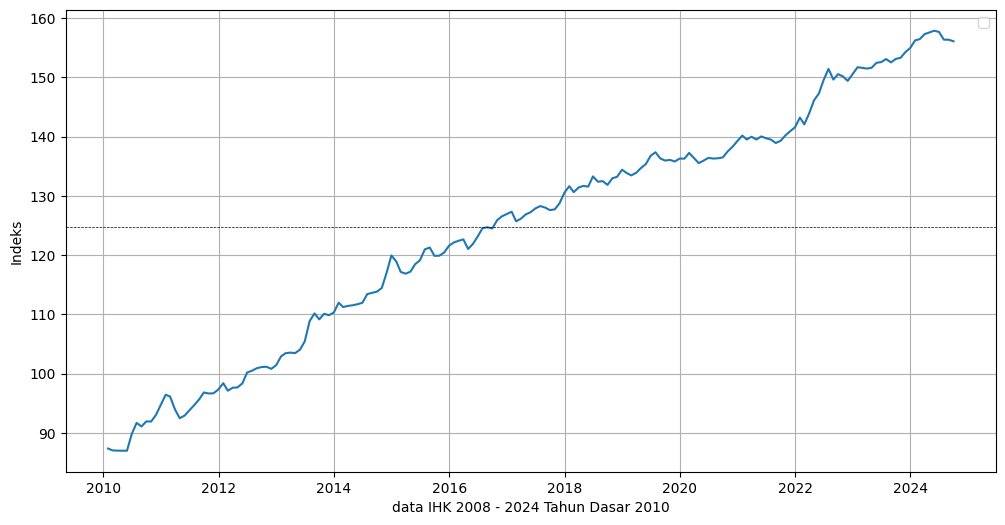

In [4]:
# df['Rolling_Mean'] = df['IHK'].rolling(window=3).mean() ##
# plt.plot(df['Rolling_Mean'])
plt.figure(figsize=(12, 6))
plt.plot(df.index,df['IHK'])
plt.axhline(df['IHK'].mean(), color='black', linewidth=0.5, linestyle='--')
plt.xlabel("data IHK 2008 - 2024 Tahun Dasar 2010")
plt.savefig('plot_IHK.png', dpi=300, bbox_inches='tight')
plt.ylabel("Indeks")
plt.legend()
plt.grid()
plt.show()

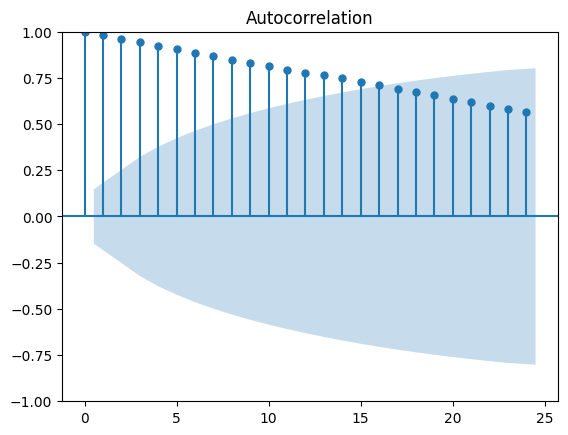

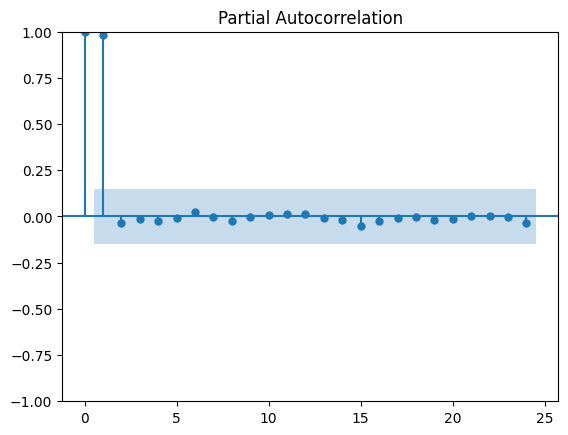

In [5]:
# Menggambarkan ACF dan PACF untuk menentukan parameter
plot_acf(df['IHK'], lags=24)
plt.savefig('plot_acfdata.png', dpi=300, bbox_inches='tight')
plot_pacf(df['IHK'], lags=24)
plt.savefig('plot_pacf-data.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
data = df['IHK']

# Lakukan uji ADF
result = adfuller(data, maxlag=12)
# Tampilkan hasil
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -1.654742038390344
p-value: 0.4545684995064478
Critical Values:
   1%: -3.468952197801766
   5%: -2.878495056473015
   10%: -2.57580913601947


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


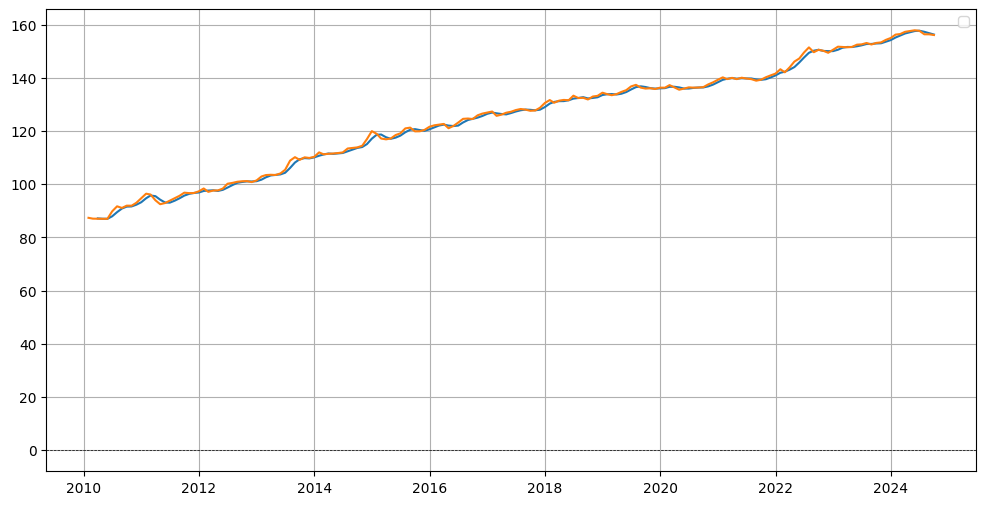

In [7]:
df['Rolling_Mean'] = df['IHK'].rolling(window=3).mean() ##
plt.figure(figsize=(12, 6))
plt.plot(df['Rolling_Mean'])
plt.plot(df.index,df['IHK'])
plt.savefig('plot_IHK.png', dpi=300, bbox_inches='tight')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


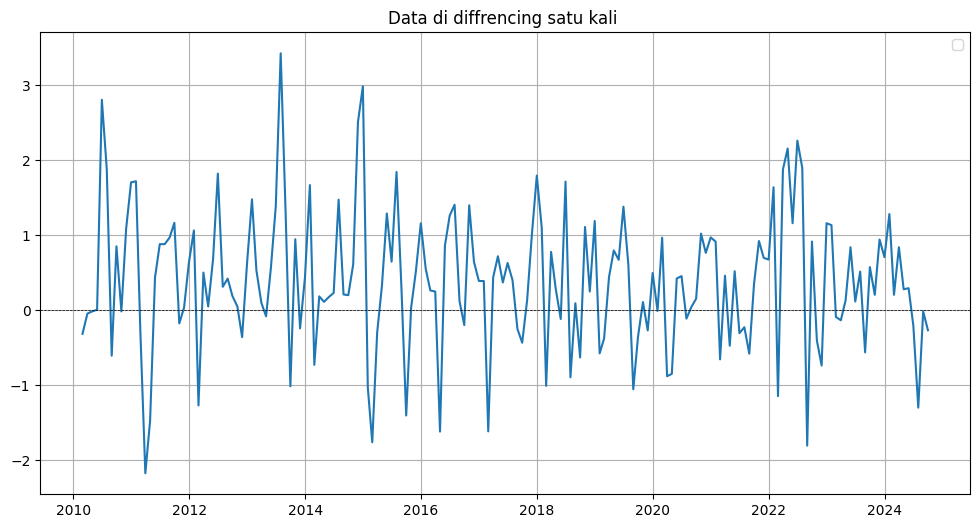

In [8]:
# Menghitung rolling mean dengan jendela 7
plt.figure(figsize=(12, 6))
plt.plot(df.index,df['IHK'].diff())
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.title("Data di diffrencing satu kali ")
plt.savefig('plot_IHK_diff1.png', dpi=300, bbox_inches='tight')
plt.legend()
plt.grid()
plt.show()

<Figure size 2400x1200 with 0 Axes>

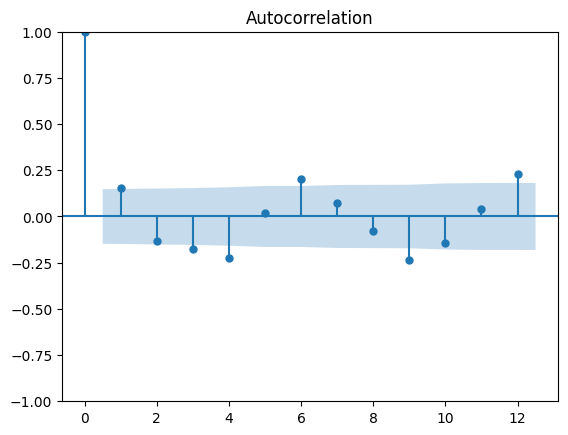

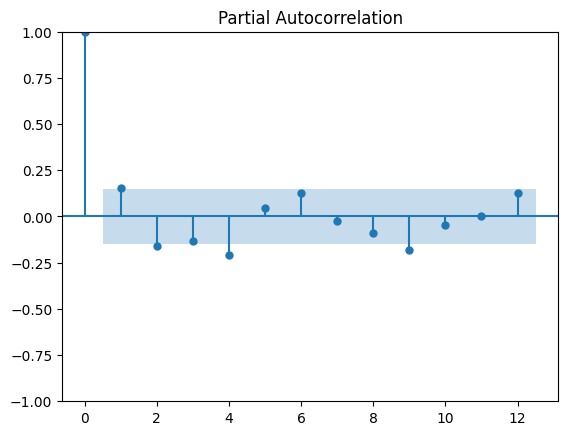

In [9]:
# Menggambarkan ACF dan PACF untuk menentukan parameter
plt.figure(figsize=(24, 12))
plot_acf(df['IHK'].diff().dropna(), lags=12)
plt.savefig('plot_IHK.acf_diff1.png', dpi=300, bbox_inches='tight')
plot_pacf(df['IHK'].diff().dropna(), lags=12)
plt.savefig('plot_IHK.pacf_diff1.png', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
data = df['IHK'].diff().dropna()

# Lakukan uji ADF
result = adfuller(data, maxlag=12)
# Tampilkan hasil
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -9.16123265879607
p-value: 2.529807386317739e-15
Critical Values:
   1%: -3.468952197801766
   5%: -2.878495056473015
   10%: -2.57580913601947


In [11]:
data.diff()

2010-02-28         NaN
2010-03-31    0.269754
2010-04-30    0.029163
2010-05-31    0.021872
2010-06-30    2.799604
                ...   
2024-05-31    0.014750
2024-06-30   -0.501486
2024-07-31   -1.091469
2024-08-31    1.283213
2024-09-30   -0.250743
Freq: M, Name: IHK, Length: 176, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


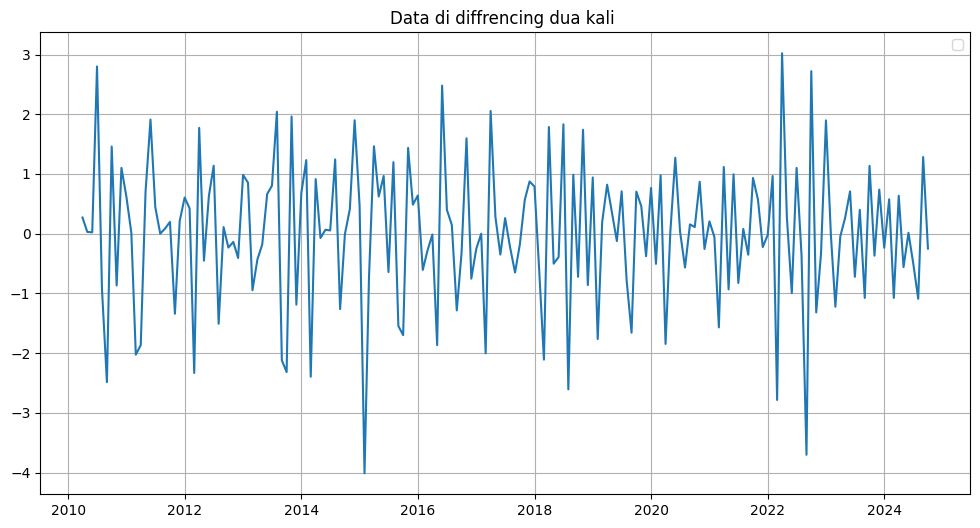

In [12]:
# Menghitung rolling mean dengan jendela 7
plt.figure(figsize=(12, 6))
plt.plot(data.diff().dropna())

plt.title("Data di diffrencing dua kali ")
plt.savefig('plot_IHK_diff2.png', dpi=300, bbox_inches='tight')
plt.legend()
plt.grid()
plt.show()

In [13]:
# Lakukan uji ADF
s = data.diff().dropna()
result = adfuller(s, maxlag=12)
# Tampilkan hasil
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -7.848442696284217
p-value: 5.685731013927752e-12
Critical Values:
   1%: -3.47086589632514
   5%: -2.879330279087651
   10%: -2.57625492712671


<Figure size 1200x600 with 0 Axes>

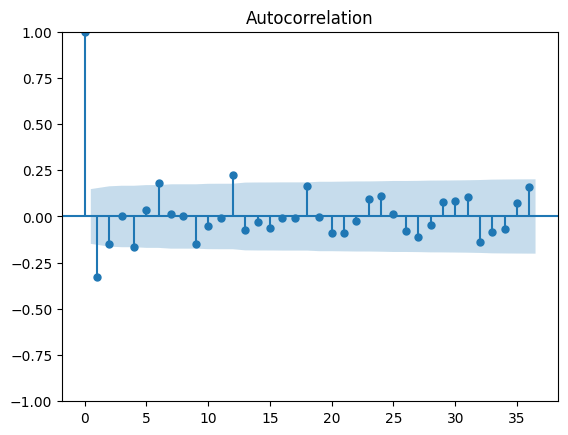

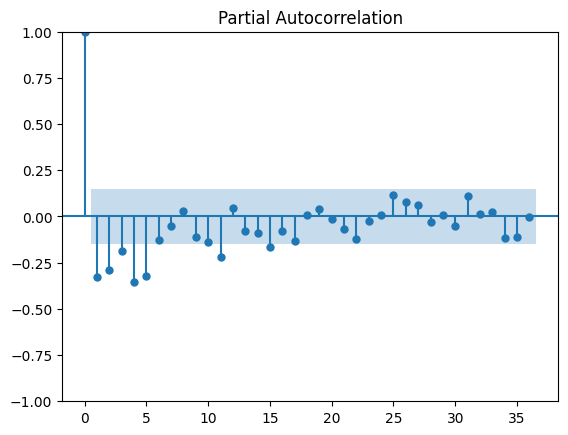

In [14]:
# Menggambarkan ACF dan PACF untuk menentukan parameter
plt.figure(figsize=(12, 6))
a = df['IHK'].diff()
b = a.diff()
plot_acf(b.dropna(), lags=36)
plt.savefig('plot_IHK.acf_diff2.png', dpi=300, bbox_inches='tight')
plot_pacf(b.dropna(), lags=36)
plt.savefig('plot_IHK.pacf_diff2.png', dpi=300, bbox_inches='tight')
plt.show()

/home/kevinpnjt/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Absolute Error (Mape) pada data pengujian: 0.03598316166389121
                               SARIMAX Results                                
Dep. Variable:                    IHK   No. Observations:                  141
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -169.698
Date:                Wed, 20 Nov 2024   AIC                            357.397
Time:                        11:11:09   BIC                            383.871
Sample:                    01-31-2010   HQIC                           368.155
                         - 09-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1135      0.279      3.991      0.000       0.567       1.660
ar.L2         -0.2671      0.556     -0.480      0.631      -1.

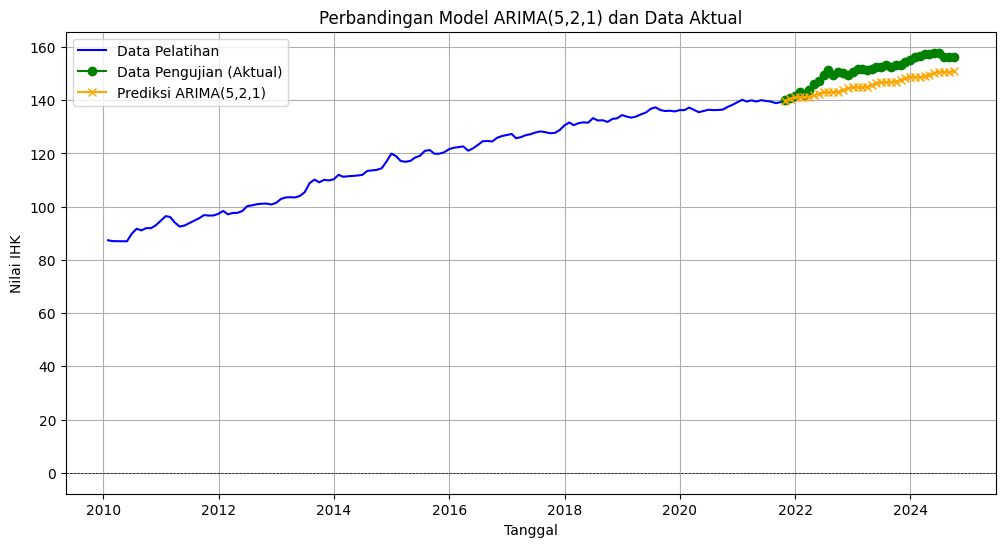

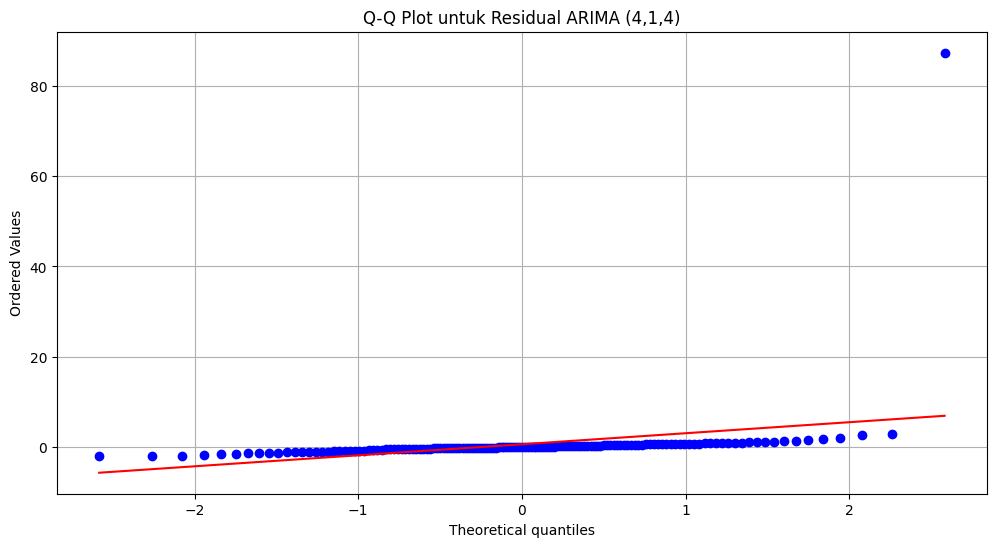

In [29]:
# Memisahkan data menjadi 80% pelatihan dan 20% pengujian
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit model pada data pelatihan
model = ARIMA(train['IHK'], order=(4, 1, 4))
model_fit = model.fit()
residuals = model_fit.resid
# Melakukan prediksi untuk periode pengujian
n_forecast = len(test)
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_values = forecast.predicted_mean

# # Menampilkan hasil prediksi
# print("Prediksi IHK:")
# print(forecast_values)
print(model_fit.summary())
#Plot hasil
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['IHK'], label='Data Pelatihan', color='blue')
plt.plot(test.index, test['IHK'], label='Data Pengujian (Aktual)', color='green', marker='o')
plt.plot(test.index, forecast_values, label='Prediksi ARIMA(5,2,1)', color='orange', marker='x')
plt.title('Perbandingan Model ARIMA(5,2,1) dan Data Aktual')
plt.xlabel('Tanggal')
plt.ylabel('Nilai IHK')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.savefig('plot_model_arima', dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot untuk Residual ARIMA (4,1,4)')
plt.savefig('plot-qq-plot residual.png', dpi=300, bbox_inches='tight')
plt.grid()
plt.show()

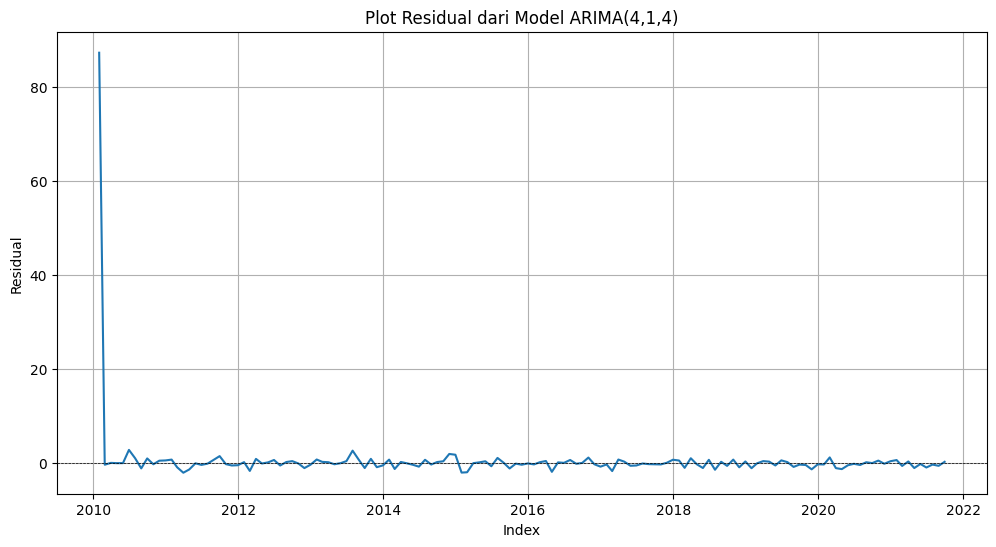

In [17]:
# --- Plot Residual ---
# Menghitung residual dari model


# Plot residual
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Plot Residual dari Model ARIMA(4,1,4)')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.show()
# 1. Q-Q Plot untuk memeriksa kesesuaian dengan distribusi normal



<Figure size 1200x600 with 0 Axes>

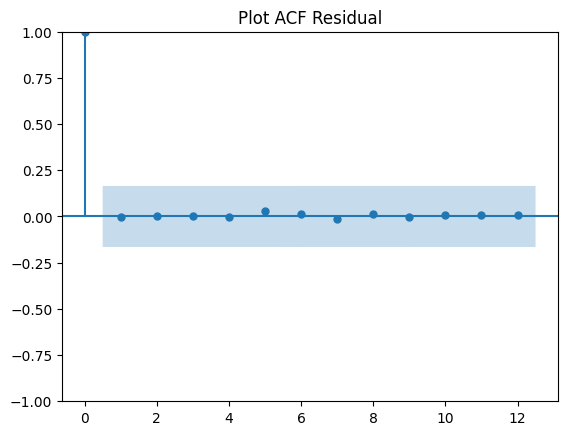

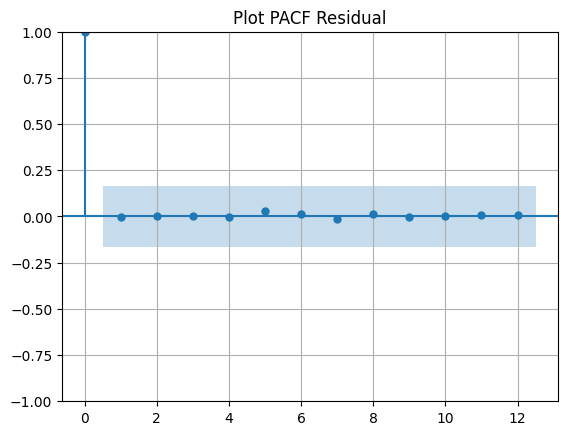

In [30]:
# Membuat plot Autokorelasi dari residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=12)  
plt.title('Plot ACF Residual')
plt.savefig('plot_acf-residual.png', dpi=300, bbox_inches='tight')
plot_pacf(residuals, lags=12)  
plt.title('Plot PACF Residual')
plt.savefig('plot_pacf-residual.png', dpi=300, bbox_inches='tight')
plt.grid(True)

In [32]:
from sklearn.metrics import mean_absolute_percentage_error
#Menghitung error (MAE) pada data pengujian
mape = mean_absolute_percentage_error(test['IHK'], forecast_values)
print(f'Mean Absolute Error (Mape) pada data pengujian: {mape}')

Mean Absolute Error (Mape) pada data pengujian: 0.03598316166389121


In [38]:
# Prediksi untuk 12 bulan ke depan
forecast_steps = 100  # prediksi 12 bulan ke depan
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Menampilkan hasil prediksi untuk 12 bulan ke depan
print("Prediksi IHK untuk 12 bulan ke depan:")
print(forecast_values).tail

Prediksi IHK untuk 12 bulan ke depan:
2021-10-31    139.878988
2021-11-30    140.564115
2021-12-31    141.110232
2022-01-31    141.147026
2022-02-28    141.089403
2022-03-31    141.217565
2022-04-30    141.815555
2022-05-31    142.518872
2022-06-30    143.003542
2022-07-31    143.046387
2022-08-31    142.982559
2022-09-30    143.160685
2022-10-31    143.759345
2022-11-30    144.459563
2022-12-31    144.900364
2023-01-31    144.937321
2023-02-28    144.881389
2023-03-31    145.097925
2023-04-30    145.703959
2023-05-31    146.391589
2023-06-30    146.796269
2023-07-31    146.823956
2023-08-31    146.782443
2023-09-30    147.032042
2023-10-31    147.646729
2023-11-30    148.317173
2023-12-31    148.689574
2024-01-31    148.708045
2024-02-29    148.684288
2024-03-31    148.964046
2024-04-30    149.586498
2024-05-31    150.237257
2024-06-30    150.579707
2024-07-31    150.590368
2024-08-31    150.586304
2024-09-30    150.894241
2024-10-31    151.522739
2024-11-30    152.152270
2024-12-31  

# ini fixxx vin hahaha